<a href="https://colab.research.google.com/github/AnkitPatel745/Text-Data-Analysis/blob/Comment-Analysis/Text_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# improting reqired library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the file
# Parse Error can be removed by ("error_bad_lines")
comment = pd.read_csv('/content/drive/MyDrive/Data Science Project/EDA Projects/GBcomments.csv',error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [4]:
# First look 
comment.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [5]:
#!pip install textblob library
from textblob import TextBlob

In [7]:
# Look for polarity of the first comment
TextBlob("It's more accurate to call it the M+ (1000) be...").sentiment.polarity

0.45000000000000007

In [9]:
# Finding any null value
comment.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [10]:
# dropping null value
comment.dropna(inplace=True)

In [11]:
# Appendding polarity value 
polarity=[]
for i in comment['comment_text']:
   polarity.append(TextBlob(i).sentiment.polarity)

In [12]:
# Creating new polarity column
comment['polarity']=polarity

In [13]:
# First look
comment.head(20)

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.450000
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.000000
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0,0.300000
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0,0.000000
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0,-0.100000
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0,0.028571
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0,0.500000


In [14]:
# Consider only polarity 1 value
comment_positive = comment[comment['polarity']==1]

In [15]:
# Shape of the positive comment
comment_positive.shape

(20400, 5)

In [16]:
#!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

In [20]:
# Unique Value
stopwords=set(STOPWORDS)

In [26]:
# Joining The Positive Comment 
total_comment=' ' .join(comment_positive['comment_text'])

In [30]:
# First look
#total_comment

In [31]:
# Creating The Word Cloud
wordcloud=WordCloud(width=1000,height=500).generate(total_comment)

(-0.5, 999.5, 499.5, -0.5)

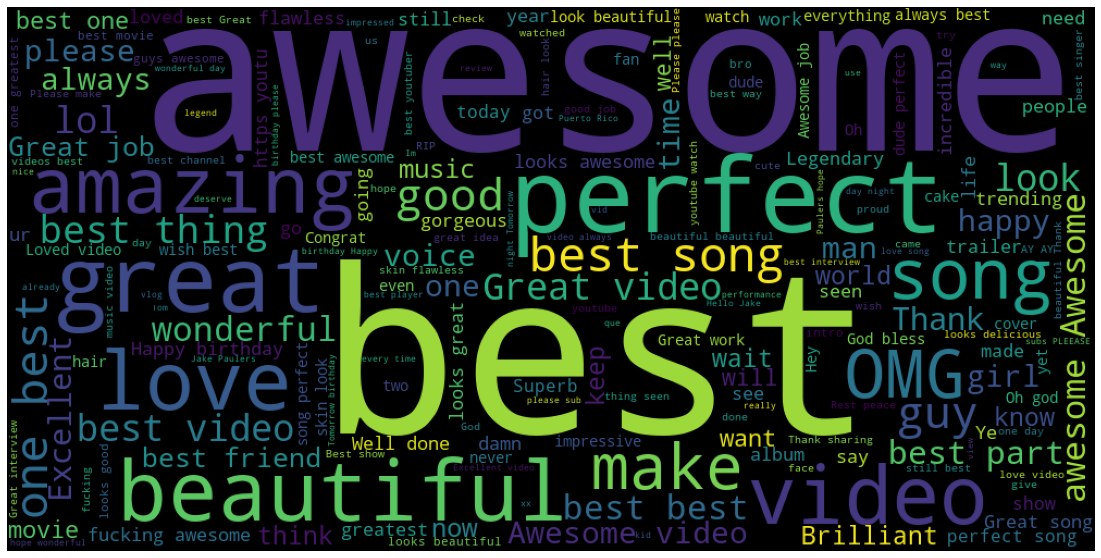

In [32]:
# Plot the Figure
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')

In [33]:
# Consider only polarity -1 value
comment_negative = comment[comment['polarity']==-1]

In [34]:
# Joining The Nagative Comment 
total_comment=' ' .join(comment_negative['comment_text'])

In [35]:
# Creating The Word Cloud
wordcloud=WordCloud(width=1000,height=500).generate(total_comment)

(-0.5, 999.5, 499.5, -0.5)

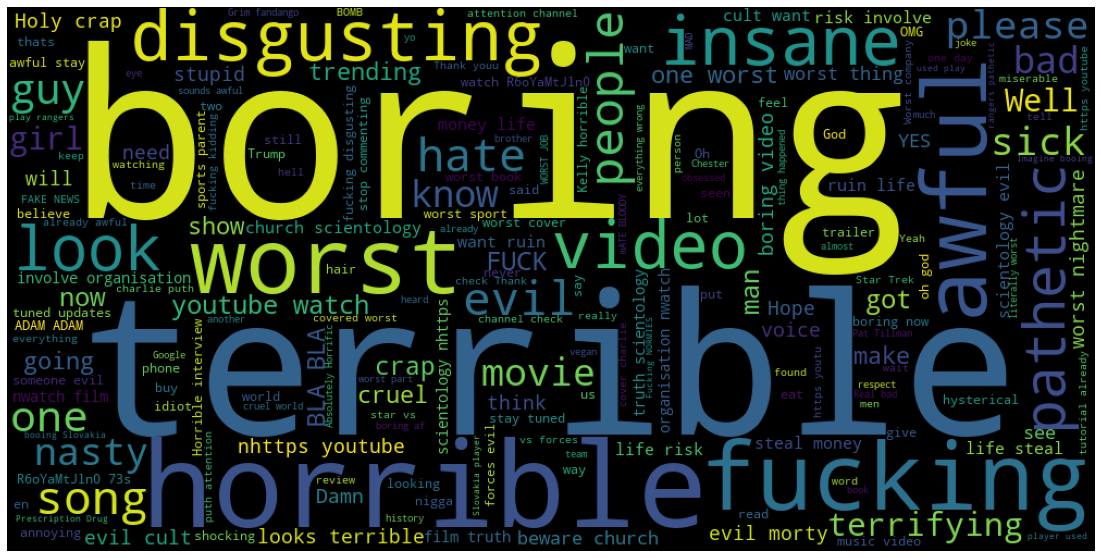

In [36]:
# Plot the Figure
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')